In [7]:
# Imports and utility functions
import sympy
import numpy as np
from sympy import nsolve, pi, E, log, S, latex, Float, I
from sympy.abc import x
from sympy.physics.units import percent, K, hbar, nm, V, eV, electron_rest_mass, meter, kg, second, K, boltzmann_constant, cm, planck, elementary_charge, coulomb, mm, um,ohm, A,us, ms, vacuum_permittivity, farad, ns
from sympy.physics.units import convert_to
from sympy import sin, cos, sqrt, sinh, cosh
from sympy.plotting import plot
from sympy import integrate

from sympy.physics.units import Quantity
from IPython.display import Markdown as md
from matplotlib import pyplot as plt

def latex_units(expr, units):
    if units == 1:
        return latex(Float(simplify(expr), 3))
    return latex(Float(simplify(expr / units), 3)) + " " + latex(units)

def unit(expr):
    try:
        return expr.as_coeff_Mul()[1]
    except:
        return 1

def simplify(expr):
    return convert_to(expr, [kg, meter, second, K, coulomb]).evalf(50)
    
def symbool(expr):
    return bool(convert_to(expr, [kg, meter, second, K, coulomb]))
def without_units(x_units, y_units):
    def wrapper(f):
        def f_(x):
            return simplify(f(x * x_units) / y_units)
        return f_
    return wrapper

def plot_this(x_min, x_max, y_units, num = 100):
    def wrapper(f):
        x_units = unit(x_min)
        f_ = lambda x: simplify(f(x * x_units) / y_units)

        x = np.linspace(float(x_min/x_units), float(x_max/x_units), num)
        y = np.array([f_(x_) for x_ in x])

        plt.plot(x, y)

        plt.xlabel(f"${latex(x_units).replace('//', '////')}$")
        plt.ylabel(latex(y_units))
        return f
    return wrapper

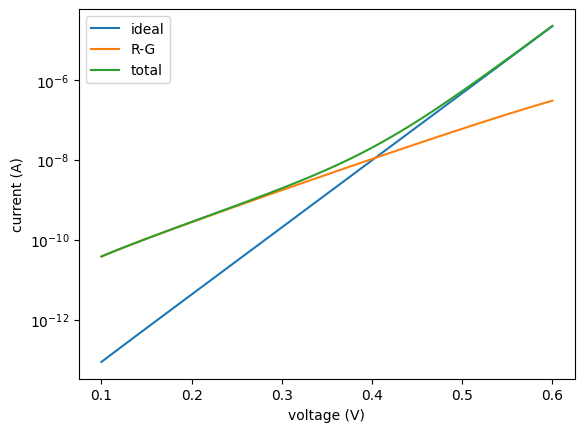

In [8]:
# Problem 1

N_A = 1 * 10**16 / cm**3
N_D = 1 * 10**16 / cm**3
tau = 5 * 10**(-7) * second
D_p = 10 * cm**2 / second
D_n = 25 * cm**2 / second
area = 1 * 10**(-4) * cm**2

n_i = 1 * 10**10 / cm**3
T = 300 * K
e_r = 11.7 # also K_s (relative permittivity)

thermal_voltage = boltzmann_constant * T / elementary_charge

V_bi = simplify(thermal_voltage * log(N_A * N_D / n_i**2))

@without_units(V, A)
def i_ideal(v):
    L_n = sqrt(D_n*tau)
    J_n = elementary_charge * (D_n/L_n) * n_i ** 2 / N_A

    L_p = sqrt(D_p*tau)
    J_p = elementary_charge * (D_p/L_p) * n_i ** 2 / N_D

    return area * (J_n + J_p) * (E ** (v/thermal_voltage) - 1)

@without_units(V, A)
def i_rg(v):
    constant_coeff = 2 * e_r * vacuum_permittivity / elementary_charge
    W = sqrt (constant_coeff * (V_bi - v) * (N_A + N_D) / (N_A * N_D))
    return area * (elementary_charge * n_i * W / (2 *tau)) * (E ** (v/(2*thermal_voltage)) - 1)
    
x_min = 0.1 # V
x_max = 0.6
x = np.linspace(x_min , x_max, 100)
y_1 = np.array([i_ideal(x_) for x_ in x])
plt.plot(x, y_1, label="ideal")

y_2 = np.array([i_rg(x_) for x_ in x])
plt.plot(x, y_2, label="R-G")

y_3 = y_1 + y_2
plt.plot(x, y_3, label="total")

plt.yscale("log")
plt.xlabel("voltage (V)")
plt.ylabel("current (A)")
plt.legend(loc="upper left")


In [9]:
# Problem 2

N_A = 5 * 10**15 / cm**3
N_D = 5 * 10**15 / cm**3
tau = 1 * 10**(-7) * second
v = - 10 * V
G_opt = 4**19 / (cm**3 * second)

n_i = 1 * 10**10 / cm**3
T = 300 * K
e_r = 11.7

thermal_voltage = boltzmann_constant * T / elementary_charge
V_bi = simplify(thermal_voltage * log(N_A * N_D / n_i**2))

constant_coeff = 2 * e_r * vacuum_permittivity / elementary_charge
W = simplify(sqrt (constant_coeff * (V_bi - v) * (N_A + N_D) / (N_A * N_D)))


# L_p = sqrt(D_p*tau)
# J_p = elementary_charge * (D_p/L_p) * n_i ** 2 / N_D

# L_n = sqrt(D_n*tau)
# J_n = elementary_charge * (D_n/L_n) * n_i ** 2 / N_A
# J_leak = J_n + J_p

constant_coeff = 2 * e_r * vacuum_permittivity / elementary_charge
J_RG = (elementary_charge * n_i * W / (2 *tau)) * (E ** (v/(2*thermal_voltage)))

J_opt = G_opt * W * elementary_charge
# display(md(f"$$J = J_{{leak}} + J_{{opt}} = {latex_units(J_leak, A/(cm**2))} + {latex_units(J_opt, A/(cm**2))} = {latex_units(J_leak + J_opt, A/(cm**2))}$$"))
display(md(f"$$J = J_{{RG}} + J_{{opt}} = {latex_units(J_RG, A/(cm**2))} + {latex_units(J_opt, A/(cm**2))} = {latex_units(J_RG + J_opt, A/(cm**2))}$$"))

$$J = J_{RG} + J_{opt} = 1.9 \cdot 10^{-90} \frac{\text{A}}{\text{cm}^{2}} + 1.04 \cdot 10^{-11} \frac{\text{A}}{\text{cm}^{2}} = 1.04 \cdot 10^{-11} \frac{\text{A}}{\text{cm}^{2}}$$

In [10]:
# Problem 3

T = 300 * K
tau = 1 * 10**(-7) * second
I_0 = 1 * 10**(-3) * A

# From ideal diode equation:
# I_D = I_S * (E ** (V_D / (n * V_T)) - 1)
# dI_D = I_S * (E ** (V_D / (n * V_T))) * (1 / (n * V_T)) * dV_D
# dI_D = I_D * (1 / (n * V_T)) * dV_D
# G = dI_D / dV_D = I_D / (n * V_T)

thermal_voltage = simplify(boltzmann_constant * T / elementary_charge)
G_0 = I_0 / thermal_voltage

def Y_D(w):
    return G_0 * sqrt(1 + I * w * tau)

def Z_D(w):
    return 1 / Y_D(w)

def solve_problem(w):
    Z = Z_D(w)
    resistance, reactance = Z.as_real_imag()
    return f"${latex_units(resistance, ohm)}$ + ${latex_units(reactance, ohm)}$ i"

display(md(f"""
10kHz: {solve_problem(10 * 10**3 * 2 * pi / second)}\\
100kHz: {solve_problem(100 * 10**3 * 2 * pi / second)}\\
1MHz: {solve_problem(1 * 10**6 * 2 * pi / second)}\\
10MHz: {solve_problem(10 * 10**6 * 2 * pi / second)}
"""))


10kHz: $25.9 \Omega$ + $-0.0812 \Omega$ i\
100kHz: $25.8 \Omega$ + $-0.81 \Omega$ i\
1MHz: $22.9 \Omega$ + $-6.58 \Omega$ i\
10MHz: $7.8 \Omega$ + $-6.65 \Omega$ i


In [11]:
# Problem 4

I_S = 5 * 10**(-12) * A
max_R = 32 * ohm
T = 300 * K

thermal_voltage = simplify(boltzmann_constant * T / elementary_charge)
min_I = thermal_voltage / max_R

# From ideal diode equation:
# min_I = I_S * (E ** (V_D / (n * V_T)) - 1)
# min_I / I_S + 1 = E ** (V_D / (n * V_T)) 
# log(min_I / I_S + 1) = V_D / (n * V_T)
# n * V_T * log(min_I / I_S + 1) = V_D

V_D = simplify(thermal_voltage * log(min_I / I_S + 1))

display(md(f"$$V_D = {latex_units(V_D, V)}$$"))


$$V_D = 0.489 \text{V}$$

In [12]:
# Problem 5

I_f = 1 * 10 ** -3 * A
I_0 = 1 * 10 ** -15 * A
tau = 1 * 10**(-6) * second

# Pierret 8.16:
# v_A(t) = kT/q ln(1 + I_F/I_0 (1-e^(-t/tau)))
# v_A(t) = 0.9 * v_A(inf) -> 
# kT/q ln(1 + I_F/I_0 (1-e^(-t/tau))) = 0.9 * kT/q ln(1 + I_F/I_0)
# 1 + I_F/I_0 (1-e^(-t/tau)) = (1 + I_F/I_0)^0.9
# I_F/I_0 (1-e^(-t/tau)) = (1 + I_F/I_0)^0.9 - 1
# 1-e^(-t/tau) = ((1 + I_F/I_0)^0.9 - 1) / (I_F/I_0)
# e^(-t/tau) = 1 - ((1 + I_F/I_0)^0.9 - 1) / (I_F/I_0)
# -t/tau = ln(1 - ((1 + I_F/I_0)^0.9 - 1) / (I_F/I_0))
# t = -tau * ln(1 - ((1 + I_F/I_0)^0.9 - 1) / (I_F/I_0))

t = -tau * log(1 - ((1 + I_f/I_0)**0.9 - 1) / (I_f/I_0))
display(md(f"$$t = {latex_units(t, ns)}$$"))

$$t = 65.2 \text{ns}$$